# Import Pandas

In [1]:
import pandas as pd

# Import Data

In [2]:
dtype_dict = {'bathrooms':float, 'waterfront':int,
              'sqft_above':int, 'sqft_living15':float,
              'grade':int, 'yr_renovated':int,
              'price':float, 'bedrooms':float,
              'zipcode':str, 'long':float,
              'sqft_lot15':float, 'sqft_living':float,
              'floors':float, 'condition':int,
              'lat':float, 'date':str, 'sqft_basement':int,
              'yr_built':int, 'id':str, 'sqft_lot':int,
              'view':int}

sales = pd.read_csv('kc_house_data.csv', dtype=dtype_dict)
sales

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180.0,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340.0,5650.0
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570.0,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690.0,7639.0
2,5631500400,20150225T000000,180000.0,2.0,1.00,770.0,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720.0,8062.0
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960.0,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360.0,5000.0
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680.0,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800.0,7503.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,0263000018,20140521T000000,360000.0,3.0,2.50,1530.0,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530.0,1509.0
21609,6600060120,20150223T000000,400000.0,4.0,2.50,2310.0,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830.0,7200.0
21610,1523300141,20140623T000000,402101.0,2.0,0.75,1020.0,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020.0,2007.0
21611,0291310100,20150116T000000,400000.0,3.0,2.50,1600.0,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410.0,1287.0


## Converting to a Numpy

In [3]:
import numpy as np
def get_numpy_data(dataframe, features, output):
    dataframe['constant'] = 1 # add a constant column to a DataFrame
    # prepend variable 'constant' to the features list
    features = ['constant'] + features
    # select the columns of DataFrame given by the ‘features’ list into the DataFrame ‘features_Dataframe’
    features_Dataframe=dataframe[features]
    # this will convert the features_sframe into a numpy matrix:
    features_matrix = features_Dataframe.to_numpy()
    # assign the column of data_sframe associated with the target to the variable ‘output_sarray’
    output_darray = dataframe[output]
    # this will convert the SArray into a numpy array:
    output_array = output_darray.to_numpy()
    return(features_matrix, output_array)

# Calculating the Derivative

In [79]:
def predict_output(feature_matrix, weights):
    predictions = np.dot(feature_matrix, weights)
    predictions=np.around(predictions, decimals=2)
    return(predictions)

In [23]:
def derivative(error,feature,weight,alpha,constant):
    if constant==True:
        derivative=2*np.dot(error,feature)
    else:
        derivative=2*np.dot(error,feature)+2*alpha*weight
    return derivative

In [82]:
(features,output) = get_numpy_data(sales, ['sqft_living'], 'price')
weights = np.array([1., 10.])
y=predict_output(features,weights)
error=y-output

print(derivative(error,features[:,1],weights[1],1,False))
print(np.sum(error*features[:,1])*2+20)
print()

print(derivative(error,features[:,0],weights[0],1,True))
print(np.sum(error)*2)

-56554166815950.0
-56554166815950.0

-22446749330.0
-22446749330.0


# Gradient Descent

In [107]:
def ridge_regression_gradient_descent(features, output, initial_weights, step_size, alpha, max_iterations=100):
    weights = np.array(initial_weights)
    iterations=0
    while iterations<max_iterations:
        iterations+=1
        y=predict_output(features,weights)
        error=y-output
        for i in range(len(weights)):
            if i==0:
                d=derivative(error,features[:,i],weights[i],alpha,True)
                d=float(d)
            else:
                d=derivative(error,features[:,i],weights[i],alpha,False)
                d=float(d)
            weights[i]=float(weights[i])-float(step_size*d)
        weights=np.around(weights,decimals=3)  
    return weights

In [27]:
test=pd.read_csv('kc_house_test_data.csv',dtype=dtype_dict)
train=pd.read_csv('kc_house_train_data.csv',dtype=dtype_dict)

## Simple Feature Gradient Descent

In [98]:
simple_features=['sqft_living']
output='price'
(train_features,train_output)=get_numpy_data(train,simple_features,output)
(test_features,test_output)=get_numpy_data(test,simple_features,output)

In [108]:
initial_weights=np.array([0.0,0.0])
step=1e-12
iterations=1000
alpha=0
SW_0_alpha=ridge_regression_gradient_descent(train_features,train_output,
                                     initial_weights,step,alpha,
                                     iterations)
SW_0_alpha

array([  0.098, 263.022])

In [109]:
alpha=1e11
SW_High_alpha=ridge_regression_gradient_descent(train_features,train_output,
                                     initial_weights,step,alpha,
                                     iterations)
SW_High_alpha

array([ 10.021, 124.573])

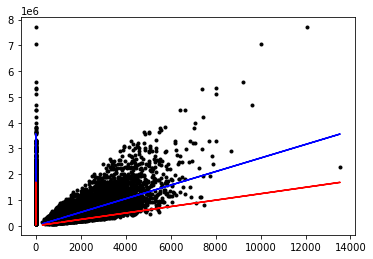

In [110]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(train_features,train_output,'k.',
        train_features,predict_output(train_features, SW_0_alpha),'b-',
        train_features,predict_output(train_features, SW_High_alpha),'r-')

In [111]:
test_y=predict_output(test_features,initial_weights)
RSS=((test_y-test_output)**2).sum()
RSS

1784273286136298.0

In [112]:
test_y=predict_output(test_features,SW_0_alpha)
RSS=((test_y-test_output)**2).sum()
RSS

275723675155888.44

In [113]:
test_y=predict_output(test_features,SW_High_alpha)
RSS=((test_y-test_output)**2).sum()
RSS

694636517874681.4

## 2-Features Gradient Descent

In [114]:
features=['sqft_living','sqft_living15']
output='price'
(train_features,train_output)=get_numpy_data(train,features,output)
(test_features,test_output)=get_numpy_data(test,features,output)

In [115]:
i_weights=np.array([0.0,0.0,0.0])
step=1e-12
iterations=1000
alpha=0
MW_0_alpha=ridge_regression_gradient_descent(train_features,train_output,
                                     i_weights,step,alpha,
                                     iterations)
MW_0_alpha

array([ -0.06 , 243.048,  22.422])

In [116]:
alpha=1e11
MW_High_alpha=ridge_regression_gradient_descent(train_features,train_output,
                                     i_weights,step,alpha,
                                     iterations)
MW_High_alpha

array([ 7.02 , 91.489, 78.438])

In [117]:
test_y=predict_output(test_features,i_weights)
RSS=((test_y-test_output)**2).sum()
RSS

1784273286136298.0

In [118]:
test_y=predict_output(test_features,MW_0_alpha)
RSS=((test_y-test_output)**2).sum()
RSS

274067305195105.25

In [119]:
test_y=predict_output(test_features,MW_High_alpha)
RSS=((test_y-test_output)**2).sum()
RSS

500400097422317.5

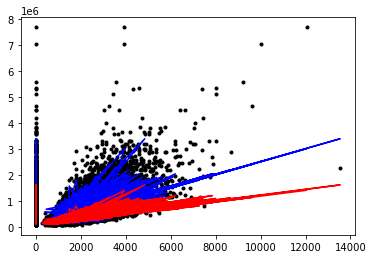

In [120]:
plt.plot(train_features,train_output,'k.',
        train_features,predict_output(train_features, MW_0_alpha),'b-',
        train_features,predict_output(train_features, MW_High_alpha),'r-')

In [121]:
test_y=predict_output(test_features[0],MW_0_alpha)
print(test_y-test_output[0])
test_y

77469.73999999999


387469.74

In [122]:
test_y=predict_output(test_features[0],MW_High_alpha)
print(test_y-test_output[0])
test_y

-39544.07000000001


270455.93

In [123]:
test.iloc[0]

id                    0114101516
date             20140528T000000
price                     310000
bedrooms                       3
bathrooms                      1
sqft_living                 1430
sqft_lot                   19901
floors                       1.5
waterfront                     0
view                           0
condition                      4
grade                          7
sqft_above                  1430
sqft_basement                  0
yr_built                    1927
yr_renovated                   0
zipcode                    98028
lat                      47.7558
long                    -122.229
sqft_living15               1780
sqft_lot15                 12697
constant                       1
Name: 0, dtype: object